In [9]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [11]:
dt=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [12]:
dt.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [13]:
dt.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [14]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [15]:
dt.dropna(inplace=True)

In [16]:
dt.shape

(244, 14)

In [17]:
dt.duplicated().sum()

0

In [18]:
dt.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [19]:
dt.loc[:122,'Region']=1
dt.loc[122:,'Region']=2
dt['Region']=dt['Region'].astype('int')

In [20]:
dt.columns=dt.columns.str.strip()

In [21]:
dt.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [22]:
dt['Classes']=dt['Classes'].str.strip()

In [23]:
dt['Classes'].value_counts()

fire        137
not fire    106
Classes       1
Name: Classes, dtype: int64

In [24]:
dt.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [25]:
dt.drop(dt[dt['Classes']=='Classes'].index,inplace=True)

In [26]:
dt[dt['Classes']=='Classes'].index

Int64Index([], dtype='int64')

In [27]:
dt['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [28]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.4+ KB


In [29]:
dt.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [30]:
dt[['day','month','year','Temperature','RH','Ws']]=dt[['day','month','year','Temperature','RH','Ws']].astype('int')

In [31]:
dt[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']]=dt[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype('float')

In [32]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 30.4+ KB


In [33]:
dt.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


In [34]:
dt.columns[5]


'Ws'

# Finding the type of distribution of each column

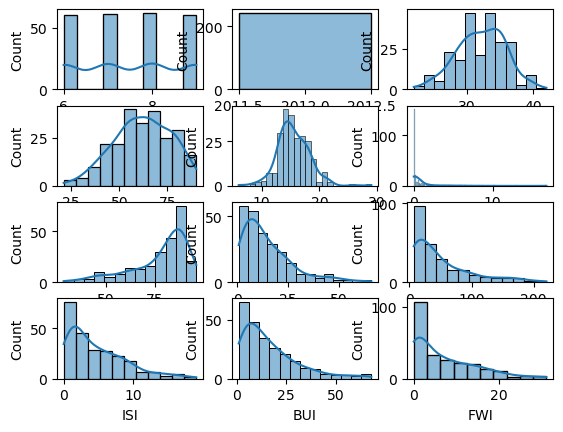

In [26]:
nrows=4
ncol=3
lst=dt.columns
plt.subplots(nrows,ncol)
for i in range(1,len(dt.columns)-2):
    if lst[i]!='day'or'month'or'year':
        plt.subplot(nrows,ncol,i)
        sb.histplot(dt[lst[i]],kde=True)
        

In [27]:
dt['Classes_encoded']=lbl.fit_transform(dt['Classes'])

In [28]:
dt.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_encoded
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1,1


In [29]:
dt['month'].value_counts()

8    62
7    61
6    60
9    60
Name: month, dtype: int64

In [30]:
ser=dt['Classes_encoded'].value_counts()
total=ser[0]+ser[1]
fr=(ser[0]/total)*100
nfr=(ser[1]/total)*100
percentage=[fr,nfr]

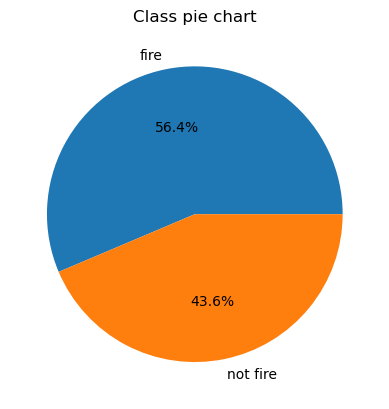

In [31]:
labels=['fire','not fire']
plt.pie(percentage,labels=labels,autopct='%1.1f%%')
plt.title('Class pie chart')
plt.show()

## For Bejaia Region

In [32]:
bejaia=dt[:122]

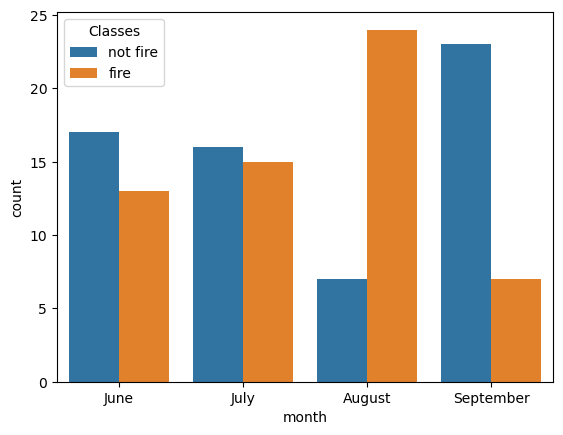

In [33]:

sb.countplot(data=bejaia,x='month',hue='Classes')
plt.xticks([0,1,2,3],['June','July','August','September'])
plt.show()

## For Sidi-Bel Abbes Region

In [34]:
sidi=dt[122:]

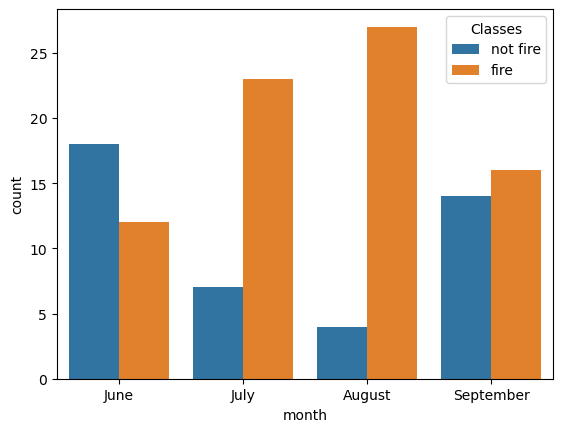

In [35]:
sb.countplot(data=sidi,x='month',hue='Classes')
plt.xticks([0,1,2,3],['June','July','August','September'])
plt.show()

<AxesSubplot: xlabel='Temperature', ylabel='fire'>

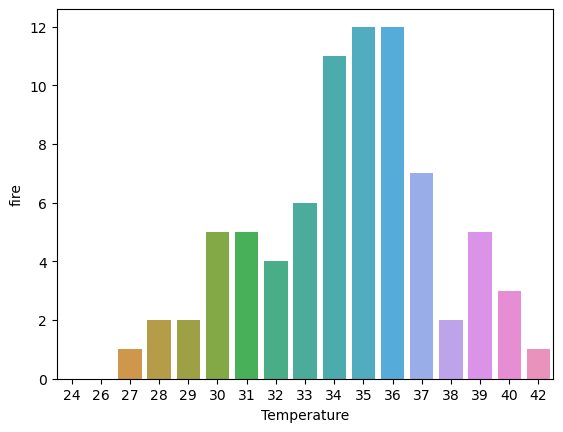

In [40]:
temp11=sidi[['Temperature','Classes']]
temp111=pd.crosstab(temp11['Temperature'],temp11['Classes']).reset_index()
sb.barplot(data=temp111,x='Temperature',y='fire',)

<AxesSubplot: xlabel='Temperature', ylabel='fire'>

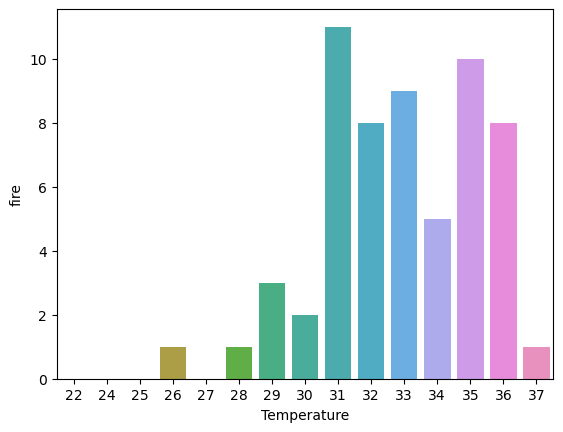

In [41]:
temp=bejaia[['Temperature','Classes']]
temp1=pd.crosstab(temp['Temperature'],temp['Classes']).reset_index()
sb.barplot(data=temp1,x='Temperature',y='fire')

In [38]:
sidi['Temperature'].value_counts()

34    17
35    14
36    12
30    12
33    10
28     8
37     7
32     7
31     7
29     7
39     6
27     4
38     3
40     3
24     2
42     1
26     1
Name: Temperature, dtype: int64

# finding the correlation between the columns

In [45]:
dt.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region',
       'Classes_encoded'],
      dtype='object')

<AxesSubplot: >

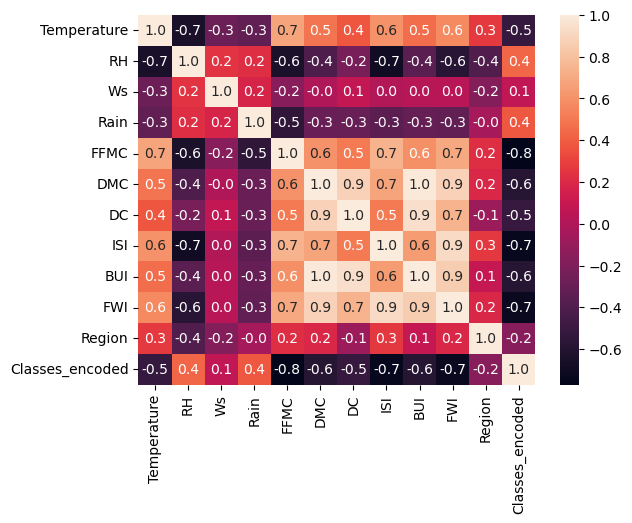

In [49]:
dtt=dt[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region',
       'Classes_encoded']]
sb.heatmap(dtt.corr(),annot=True,fmt='.1f')

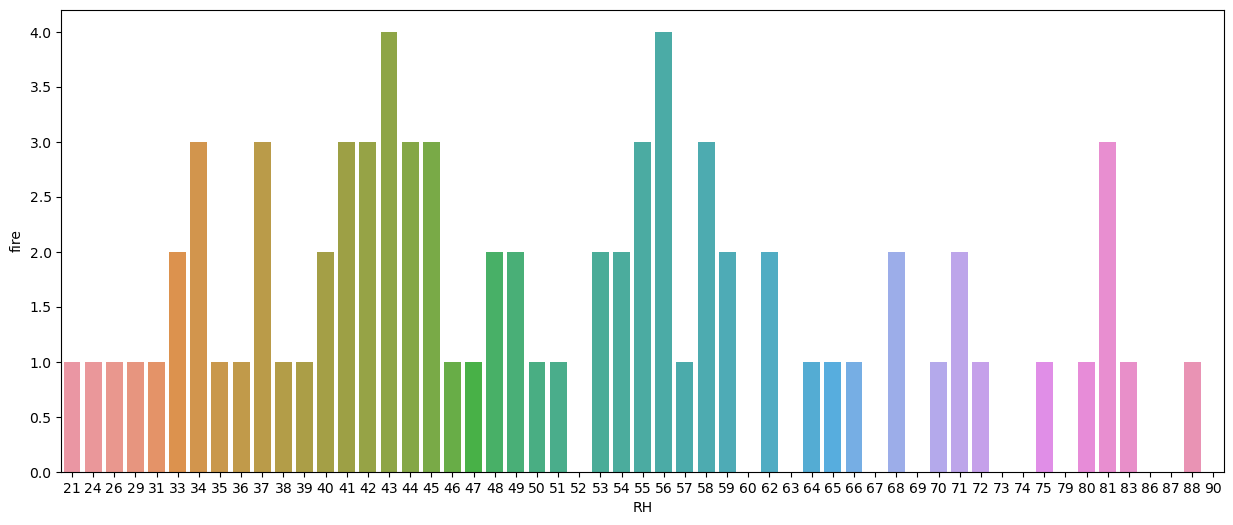

In [63]:
a=sidi[['RH','Classes']]
aa=pd.crosstab(a['RH'],a['Classes']).reset_index()
plt.figure(figsize=(15,6))
sb.barplot(data=aa,x='RH',y='fire')
plt.show()

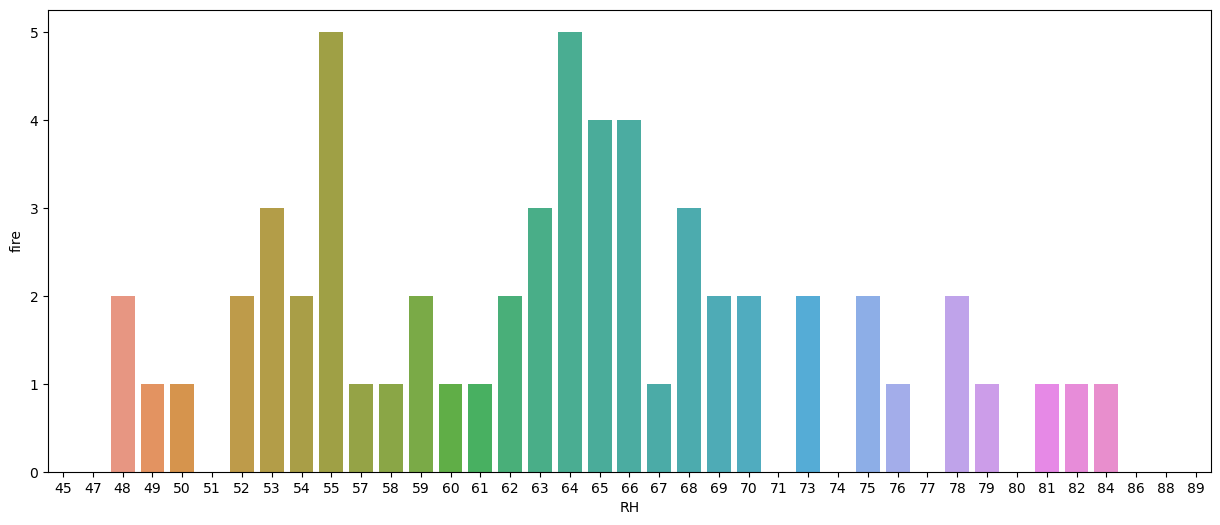

In [64]:
b=bejaia[['RH','Classes']]
bb=pd.crosstab(b['RH'],b['Classes']).reset_index()
plt.figure(figsize=(15,6))
sb.barplot(data=bb,x='RH',y='fire')
plt.show()

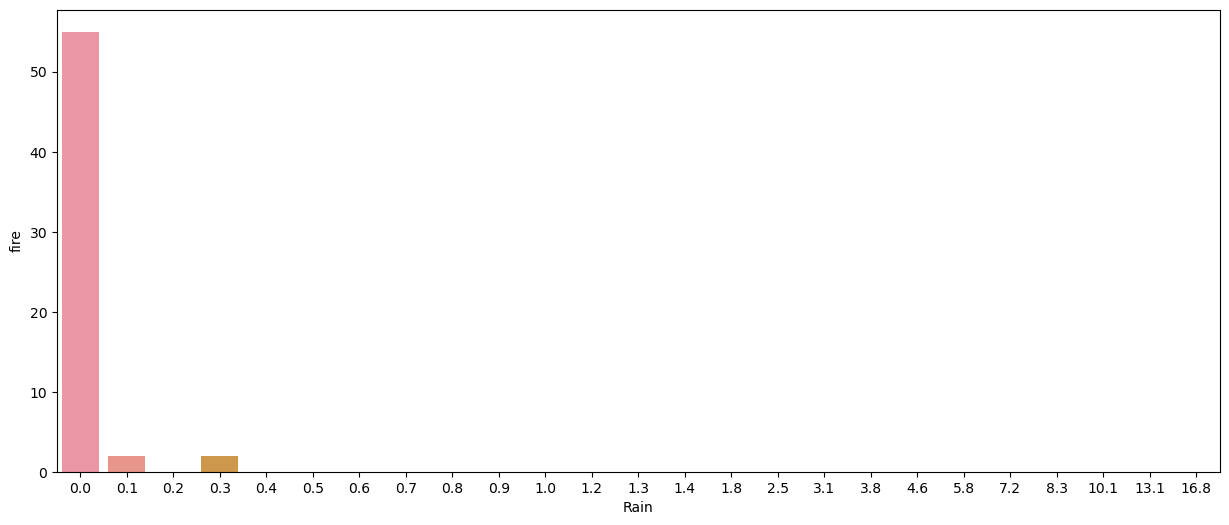

In [74]:
r=bejaia[['Rain','Classes']]
rr=pd.crosstab(r['Rain'],r['Classes']).reset_index()
plt.figure(figsize=(15,6))
sb.barplot(data=rr,x='Rain',y='fire')
plt.show()

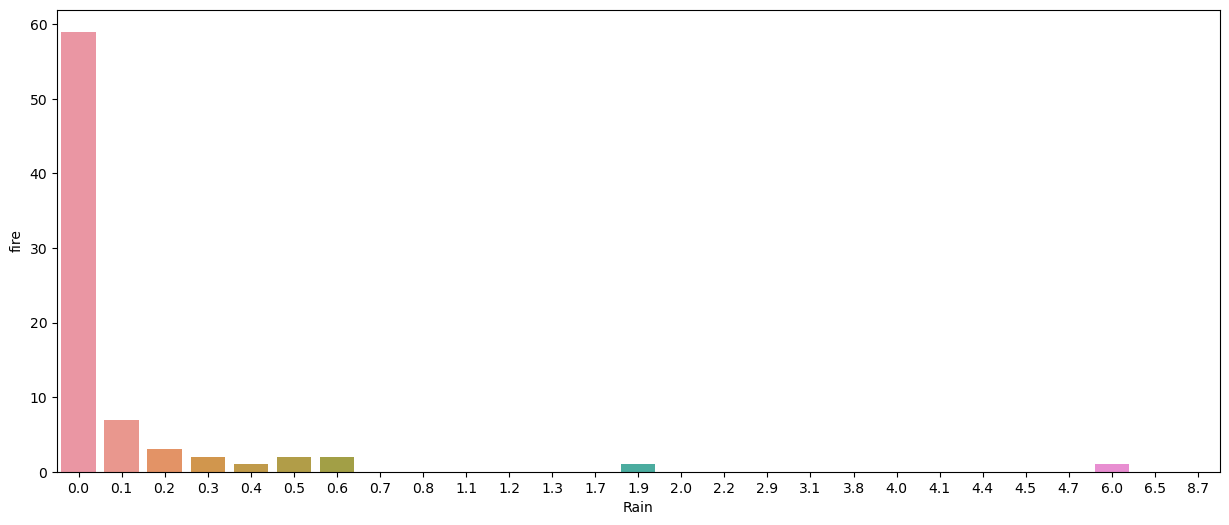

In [76]:
s=sidi[['Rain','Classes']]
ss=pd.crosstab(s['Rain'],s['Classes']).reset_index()
plt.figure(figsize=(15,6))
sb.barplot(data=ss,x='Rain',y='fire')
plt.show()

In [35]:
dt.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [38]:
dt_updated=dt.drop(['day','month','year'],axis=1)

In [39]:
dt_updated

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
242,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [42]:
dt_updated.to_csv('Algerian_forest_clean.csv',index=False)